Notebook for matching the speakers among multiple audios

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Load and prepare dataset
- clustering results from audios: 1_compressed.wav,2_compressed.wav,3_compressed.wav

In [2]:
df = pd.read_csv("clustered_speakers.csv")
df

,File,Speaker,Matched_File,Matched_Speaker,Similarity
0,1_compressed.wav,SPEAKER_09,3_compressed.wav,SPEAKER_20,0.9174
1,1_compressed.wav,SPEAKER_09,3_compressed.wav,SPEAKER_20,0.9190
2,1_compressed.wav,SPEAKER_09,3_compressed.wav,SPEAKER_20,0.9230
3,1_compressed.wav,SPEAKER_09,3_compressed.wav,SPEAKER_20,0.9233
4,1_compressed.wav,SPEAKER_09,3_compressed.wav,SPEAKER_20,0.9237
...,...,...,...,...,...
89395,3_compressed.wav,SPEAKER_19,3_compressed.wav,SPEAKER_19,0.8796
89396,3_compressed.wav,SPEAKER_19,1_compressed.wav,SPEAKER_08,0.8807
89397,3_compressed.wav,SPEAKER_19,3_compressed.wav,SPEAKER_19,0.8819
89398,3_compressed.wav,SPEAKER_19,3_compressed.wav,SPEAKER_19,0.8872


In [3]:
df['File'] = df['File'].str.split('_').str[0]
df['Matched_File'] = df['Matched_File'].str.split('_').str[0]
df['Speaker'] = df['Speaker'].str.split('_').str[1]
df['Matched_Speaker'] = df['Matched_Speaker'].str.split('_').str[1]
df

,File,Speaker,Matched_File,Matched_Speaker,Similarity
0,1,09,3,20,0.9174
1,1,09,3,20,0.9190
2,1,09,3,20,0.9230
3,1,09,3,20,0.9233
4,1,09,3,20,0.9237
...,...,...,...,...,...
89395,3,19,3,19,0.8796
89396,3,19,1,08,0.8807
89397,3,19,3,19,0.8819
89398,3,19,3,19,0.8872


In [4]:
files = ['1','2','3']
matches = []

for file in files:
    data = df[df['File'] == file]
    others = [o for o in files if o != file]


    # for each speaker, find the top match in the other two files
    for i in data['Speaker'].unique():
        speaker_i = data[data['Speaker'] == i]
        result = {
            'File': file,
            'Speaker': str(i),
            'File1': others[0],
            'Top1': None,
            'Top1_Sim': None,
            'File2': others[1],
            'Top2': None,
            'Top2_Sim': None
        }

        match1 = speaker_i[speaker_i["Matched_File"] == others[0]].sort_values("Similarity", ascending=False)
        if not match1.empty:
            result['Top1'] = match1['Matched_Speaker'].values[0]
            result['Top1_Sim'] = match1['Similarity'].values[0]

        
        match2 = speaker_i[speaker_i["Matched_File"] == others[1]].sort_values("Similarity", ascending=False)
        if not match2.empty:
            result['Top2'] = match2['Matched_Speaker'].values[0]
            result['Top2_Sim'] = match2['Similarity'].values[0]

        matches.append(result)

matches_df = pd.DataFrame(matches)

'''
matches_df['Speaker'] = matches_df['Speaker'].str.strip()
matches_df['Top1'] = matches_df['Top1'].str.strip()
matches_df['Top2'] = matches_df['Top2'].str.strip()
matches_df['File'] = matches_df['File'].astype(int)
matches_df['File1'] = matches_df['File'].astype(int)
matches_df['File2'] = matches_df['File'].astype(int)
'''


matches_df['Group_id'] = None
matches_df

,File,Speaker,File1,Top1,Top1_Sim,File2,Top2,Top2_Sim,Group_id
0,1,09,2,18,0.9823,3,20,0.9835,None
1,1,01,2,11,0.9731,3,01,0.9684,None
2,1,43,2,43,0.7871,3,12,0.7373,None
3,1,27,2,10,0.8339,3,08,0.7523,None
4,1,26,2,20,0.3838,3,10,0.4465,None
...,...,...,...,...,...,...,...,...,...
140,3,40,1,14,0.4346,2,10,0.4312,None
141,3,55,1,25,0.5339,2,24,0.5355,None
142,3,53,1,19,0.3622,2,16,0.3773,None
143,3,29,1,17,0.6440,2,15,0.6490,None


In [5]:
### change to unique speaker id

matches_df['Speaker_id'] = matches_df['File'] +'-'+ matches_df['Speaker']
matches_df['Top1_id'] = matches_df['File1'] +'-'+ matches_df['Top1']
matches_df['Top2_id'] = matches_df['File2'] +'-'+ matches_df['Top2']
matches_df 


,File,Speaker,File1,Top1,Top1_Sim,File2,Top2,Top2_Sim,Group_id,Speaker_id,Top1_id,Top2_id
0,1,09,2,18,0.9823,3,20,0.9835,None,1-09,2-18,3-20
1,1,01,2,11,0.9731,3,01,0.9684,None,1-01,2-11,3-01
2,1,43,2,43,0.7871,3,12,0.7373,None,1-43,2-43,3-12
3,1,27,2,10,0.8339,3,08,0.7523,None,1-27,2-10,3-08
4,1,26,2,20,0.3838,3,10,0.4465,None,1-26,2-20,3-10
...,...,...,...,...,...,...,...,...,...,...,...,...
140,3,40,1,14,0.4346,2,10,0.4312,None,3-40,1-14,2-10
141,3,55,1,25,0.5339,2,24,0.5355,None,3-55,1-25,2-24
142,3,53,1,19,0.3622,2,16,0.3773,None,3-53,1-19,2-16
143,3,29,1,17,0.6440,2,15,0.6490,None,3-29,1-17,2-15


# Find matches among the 3 files
- pairs among the three audios with similarity > threshold
      -> if others match with existing group, assign that group
- for the rest without matches, check if one of the tops > 0.9, and has a match -> match with that
- for the rest, allow matches with similarity > 0.85 or 0.8 and find matches
- if still no matches, assign a new id


In [6]:
# initial case
'''
threshold = 0.7    # 0.9: 3 matches

### key: group id, value: list of speakers
group_dict = {}
### key: speaker id, value: group id
aligned_speakers = {}
group_counter = 0

for file in files:
    data = matches_df[matches_df['File'] == file]

    for speaker in data['Speaker'].unique():
        row = data[data['Speaker'] == speaker].iloc[0]

        spk_id = f"{file}-{speaker}"
        top1_id = f"{row['File1']}-{row['Top1']}"
        top2_id = f"{row['File2']}-{row['Top2']}"
        sim1 = row['Top1_Sim']
        sim2 = row['Top2_Sim']

        if spk_id not in aligned_speakers:
            if sim1 >= threshold and sim2 >= threshold:
                if top1_id not in aligned_speakers and top2_id not in aligned_speakers:
                    group_id = f"group_{group_counter}"
                    group_counter += 1

                    # assign all three to this group
                    aligned_speakers[spk_id] = group_id
                    aligned_speakers[top1_id] = group_id
                    aligned_speakers[top2_id] = group_id

                    # store group members
                    group_dict[group_id] = [spk_id, top1_id, top2_id]

                    # update DataFrame
                    matches_df.loc[matches_df['Speaker_id'] == spk_id, 'Group_id'] = group_id
                    matches_df.loc[matches_df['Speaker_id'] == top1_id, 'Group_id'] = group_id
                    matches_df.loc[matches_df['Speaker_id'] == top2_id, 'Group_id'] = group_id

                    print(f'Group {group_id} assigned to: {spk_id} <-> {top1_id} <-> {top2_id}')

print(f"{group_counter} three-way matches with similarity > {threshold} found.")
'''


'\nthreshold = 0.7    # 0.9: 3 matches\n\n### key: group id, value: list of speakers\ngroup_dict = {}\n### key: speaker id, value: group id\naligned_speakers = {}\ngroup_counter = 0\n\nfor file in files:\n    data = matches_df[matches_df[\'File\'] == file]\n\n    for speaker in data[\'Speaker\'].unique():\n        row = data[data[\'Speaker\'] == speaker].iloc[0]\n\n        spk_id = f"{file}-{speaker}"\n        top1_id = f"{row[\'File1\']}-{row[\'Top1\']}"\n        top2_id = f"{row[\'File2\']}-{row[\'Top2\']}"\n        sim1 = row[\'Top1_Sim\']\n        sim2 = row[\'Top2_Sim\']\n\n        if spk_id not in aligned_speakers:\n            if sim1 >= threshold and sim2 >= threshold:\n                if top1_id not in aligned_speakers and top2_id not in aligned_speakers:\n                    group_id = f"group_{group_counter}"\n                    group_counter += 1\n\n                    # assign all three to this group\n                    aligned_speakers[spk_id] = group_id\n              

In [7]:
### add other cases


threshold = 0.7

# key: group id → list of speaker_ids
group_dict = {}

# key: speaker_id → group id
aligned_speakers = {}

group_counter = 0

for file in files:
    data = matches_df[matches_df['File'] == file]

    for speaker in data['Speaker'].unique():
        row = data[data['Speaker'] == speaker].iloc[0]

        spk_id = f"{file}-{speaker}"
        top1_id = f"{row['File1']}-{row['Top1']}"
        top2_id = f"{row['File2']}-{row['Top2']}"
        sim1 = row['Top1_Sim']
        sim2 = row['Top2_Sim']

        if spk_id not in aligned_speakers:

            # Case 1: full 3-way match
            if sim1 >= threshold and sim2 >= threshold:
                if top1_id not in aligned_speakers and top2_id not in aligned_speakers:
                    group_id = f"group_{group_counter}"
                    group_counter += 1

                    for sid in [spk_id, top1_id, top2_id]:
                        aligned_speakers[sid] = group_id
                        matches_df.loc[matches_df['Speaker_id'] == sid, 'Group_id'] = group_id

                    group_dict[group_id] = [spk_id, top1_id, top2_id]
                    print(f'Group {group_id} assigned to: {spk_id} <-> {top1_id} <-> {top2_id}')

            # Case 2: only one strong match, and its group is known
            elif sim1 >= threshold and top1_id in aligned_speakers:
                group_id = aligned_speakers[top1_id]
                aligned_speakers[spk_id] = group_id
                matches_df.loc[matches_df['Speaker_id'] == spk_id, 'Group_id'] = group_id
                group_dict[group_id].append(spk_id)
                print(f'{spk_id} matched with {top1_id} into existing {group_id}')

            elif sim2 >= threshold and top2_id in aligned_speakers:
                group_id = aligned_speakers[top2_id]
                aligned_speakers[spk_id] = group_id
                matches_df.loc[matches_df['Speaker_id'] == spk_id, 'Group_id'] = group_id
                group_dict[group_id].append(spk_id)
                print(f'{spk_id} matched with {top2_id} into existing {group_id}')

            # Cse 3: one strong match, but new group
            elif sim1 >= threshold and sim2 < threshold:
                group_id = f"group_{group_counter}"
                group_counter += 1
                for sid in [spk_id, top1_id]:
                    aligned_speakers[sid] = group_id
                    matches_df.loc[matches_df['Speaker_id'] == sid, 'Group_id'] = group_id
                group_dict[group_id] = [spk_id, top1_id]
                print(f'** New group {group_id} from {spk_id} + {top1_id}')

            elif sim2 >= threshold and sim1 < threshold:
                group_id = f"group_{group_counter}"
                group_counter += 1
                for sid in [spk_id, top2_id]:
                    aligned_speakers[sid] = group_id
                    matches_df.loc[matches_df['Speaker_id'] == sid, 'Group_id'] = group_id
                group_dict[group_id] = [spk_id, top2_id]
                print(f'New group {group_id} from {spk_id} + {top2_id}')

        else:
            # Case 4: already matched but group id missing 
            if spk_id in aligned_speakers:
                group_id = aligned_speakers[spk_id]
                if matches_df.loc[matches_df['Speaker_id'] == spk_id, 'Group_id'].isna().any():
                    matches_df.loc[matches_df['Speaker_id'] == spk_id, 'Group_id'] = group_id
        
        ### If still no group id, assign with the closest match regardless of similarity level
        ### but not creating any new groups 

        #### the left are considered as outliers
        #### either itself or its closest match is not in the group assignment 
        if matches_df.loc[matches_df['Speaker_id'] == spk_id, 'Group_id'].isna().any():
            if top1_id in aligned_speakers:
                group_id = aligned_speakers[top1_id]
                matches_df.loc[matches_df['Speaker_id'] == spk_id, 'Group_id'] = group_id
                group_dict[group_id].append(spk_id)
                print(f'** {spk_id} matched with {top1_id} into existing {group_id}')

            elif top2_id in aligned_speakers:
                group_id = aligned_speakers[top2_id]
                matches_df.loc[matches_df['Speaker_id'] == spk_id, 'Group_id'] = group_id
                group_dict[group_id].append(spk_id)
                print(f'** {spk_id} matched with {top2_id} into existing {group_id}')



count_1 = matches_df['Group_id'].nunique(dropna=True)
print(f'{count_1} speaker groups formed with similarity > {threshold}')


Group group_0 assigned to: 1-09 <-> 2-18 <-> 3-20
Group group_1 assigned to: 1-01 <-> 2-11 <-> 3-01
Group group_2 assigned to: 1-43 <-> 2-43 <-> 3-12
Group group_3 assigned to: 1-27 <-> 2-10 <-> 3-08
Group group_4 assigned to: 1-13 <-> 2-27 <-> 3-46
** 1-45 matched with 2-27 into existing group_4
** 1-31 matched with 3-08 into existing group_3
** 1-14 matched with 2-27 into existing group_4
** New group group_5 from 1-07 + 2-05
** New group group_6 from 1-34 + 2-01
** 1-41 matched with 2-01 into existing group_6
Group group_7 assigned to: 1-10 <-> 2-20 <-> 3-22
Group group_8 assigned to: 1-15 <-> 2-28 <-> 3-27
** New group group_9 from 1-05 + 2-45
** 1-11 matched with 2-27 into existing group_4
** 1-28 matched with 2-10 into existing group_3
** 1-30 matched with 2-10 into existing group_3
** 1-33 matched with 3-08 into existing group_3
** 1-08 matched with 2-18 into existing group_0
** New group group_10 from 1-23 + 2-38
** 1-22 matched with 3-27 into existing group_8
** 1-40 matched w

In [8]:
matches_df[matches_df['Group_id'].notna()].head(
)

,File,Speaker,File1,Top1,Top1_Sim,File2,Top2,Top2_Sim,Group_id,Speaker_id,Top1_id,Top2_id
0,1,09,2,18,0.9823,3,20,0.9835,group_0,1-09,2-18,3-20
1,1,01,2,11,0.9731,3,01,0.9684,group_1,1-01,2-11,3-01
2,1,43,2,43,0.7871,3,12,0.7373,group_2,1-43,2-43,3-12
3,1,27,2,10,0.8339,3,08,0.7523,group_3,1-27,2-10,3-08
5,1,13,2,27,0.7798,3,46,0.7639,group_4,1-13,2-27,3-46


In [9]:
matches_df[matches_df['Group_id'].isna()].head()


,File,Speaker,File1,Top1,Top1_Sim,File2,Top2,Top2_Sim,Group_id,Speaker_id,Top1_id,Top2_id
4,1,26,2,20,0.3838,3,10,0.4465,None,1-26,2-20,3-10
6,1,32,2,35,0.6700,3,02,0.6544,None,1-32,2-35,3-02
10,1,06,2,13,0.6915,3,25,0.6339,None,1-06,2-13,3-25
13,1,17,2,15,0.6238,3,29,0.6440,None,1-17,2-15,3-29
14,1,18,2,15,0.6220,3,29,0.5070,None,1-18,2-15,3-29


# Save to csv

In [10]:
matches_df['Character'] = None
### save 
matches_df.to_csv(f'matches_{threshold}.csv')

# Assign the results of threshold = 0.8


# Analysis from here

### with the output global_ODs

In [11]:
dataset = pd.DataFrame()
for i in range(1,4):
    data = pd.read_csv(f"./merged/{i}_merged.csv")
    data['File'] = i
    dataset = pd.concat([dataset, data], ignore_index=True)


dataset.head()

,Speaker_Start,Speaker_Stop,Speaker,Subtitle_Start,Subtitle_End,Text,Global_ID,File
0,"00:00:12,800","00:00:21,199",SPEAKER_09,"00:00:00,000","00:00:21,000","Here they are for one and all, the movements a...",G00,1
1,"00:00:21,199","00:00:21,899",SPEAKER_00,"00:00:21,000","00:00:29,000","Here for you are your TV, they are the movemen...",NaN,1
2,"00:00:21,500","00:00:21,699",SPEAKER_09,"00:00:21,000","00:00:29,000","Here for you are your TV, they are the movemen...",G00,1
3,"00:00:21,699","00:00:21,800",SPEAKER_09,"00:00:21,000","00:00:29,000","Here for you are your TV, they are the movemen...",G00,1
4,"00:00:21,800","00:00:21,800",SPEAKER_09,"00:00:21,000","00:00:29,000","Here for you are your TV, they are the movemen...",G00,1


In [12]:
dataset = dataset[dataset['Global_ID'].notna()]
dataset

,Speaker_Start,Speaker_Stop,Speaker,Subtitle_Start,Subtitle_End,Text,Global_ID,File
0,"00:00:12,800","00:00:21,199",SPEAKER_09,"00:00:00,000","00:00:21,000","Here they are for one and all, the movements a...",G00,1
2,"00:00:21,500","00:00:21,699",SPEAKER_09,"00:00:21,000","00:00:29,000","Here for you are your TV, they are the movemen...",G00,1
3,"00:00:21,699","00:00:21,800",SPEAKER_09,"00:00:21,000","00:00:29,000","Here for you are your TV, they are the movemen...",G00,1
4,"00:00:21,800","00:00:21,800",SPEAKER_09,"00:00:21,000","00:00:29,000","Here for you are your TV, they are the movemen...",G00,1
5,"00:00:21,899","00:00:25,600",SPEAKER_09,"00:00:21,000","00:00:29,000","Here for you are your TV, they are the movemen...",G00,1
...,...,...,...,...,...,...,...,...
15288,"05:26:27,000","05:26:35,000",SPEAKER_24,"05:26:25,860","05:26:27,860",But you can't eat anymore?,G05,3
15305,"05:28:03,700","05:28:08,299",SPEAKER_49,"05:28:02,860","05:28:07,860",They also learned that the fireworks were comi...,G05,3
15306,"05:28:33,799","05:28:39,700",SPEAKER_18,"05:28:32,860","05:28:49,860",The Moons are having fun day after day. The Mo...,G00,3
15307,"05:28:40,400","05:28:40,500",SPEAKER_18,"05:28:32,860","05:28:49,860",The Moons are having fun day after day. The Mo...,G00,3


In [13]:
character_df = pd.read_csv("./Global_speaker_ids/global_speaker_ids_0.8.csv")
character_df['C_Name'] = None
character_df

,Global_ID,Speaker_IDs,C_Name
0,G00,"audios/1_compressed.wav-SPEAKER_08, audios/1_c...",None
1,G01,"audios/1_compressed.wav-SPEAKER_01, audios/2_c...",None
2,G02,"audios/1_compressed.wav-SPEAKER_08, audios/2_c...",None
3,G03,"audios/1_compressed.wav-SPEAKER_23, audios/2_c...",None
4,G04,"audios/1_compressed.wav-SPEAKER_27, audios/1_c...",None
5,G05,"audios/1_compressed.wav-SPEAKER_28, audios/1_c...",None
6,G06,"audios/1_compressed.wav-SPEAKER_44, audios/2_c...",None
7,G07,"audios/2_compressed.wav-SPEAKER_08, audios/2_c...",None
8,G08,"audios/2_compressed.wav-SPEAKER_12, audios/2_c...",None
9,G09,"audios/3_compressed.wav-SPEAKER_04, audios/3_c...",None


In [14]:
character_df.loc[character_df['Global_ID'].isin(['G01', 'G00','G02','G03']), 'C_Name'] = 'background'
character_df

,Global_ID,Speaker_IDs,C_Name
0,G00,"audios/1_compressed.wav-SPEAKER_08, audios/1_c...",background
1,G01,"audios/1_compressed.wav-SPEAKER_01, audios/2_c...",background
2,G02,"audios/1_compressed.wav-SPEAKER_08, audios/2_c...",background
3,G03,"audios/1_compressed.wav-SPEAKER_23, audios/2_c...",background
4,G04,"audios/1_compressed.wav-SPEAKER_27, audios/1_c...",None
5,G05,"audios/1_compressed.wav-SPEAKER_28, audios/1_c...",None
6,G06,"audios/1_compressed.wav-SPEAKER_44, audios/2_c...",None
7,G07,"audios/2_compressed.wav-SPEAKER_08, audios/2_c...",None
8,G08,"audios/2_compressed.wav-SPEAKER_12, audios/2_c...",None
9,G09,"audios/3_compressed.wav-SPEAKER_04, audios/3_c...",None


In [15]:
character_df.loc[character_df['Global_ID'].isin(['G04']), 'C_Name'] = 'LittleMy'
character_df

,Global_ID,Speaker_IDs,C_Name
0,G00,"audios/1_compressed.wav-SPEAKER_08, audios/1_c...",background
1,G01,"audios/1_compressed.wav-SPEAKER_01, audios/2_c...",background
2,G02,"audios/1_compressed.wav-SPEAKER_08, audios/2_c...",background
3,G03,"audios/1_compressed.wav-SPEAKER_23, audios/2_c...",background
4,G04,"audios/1_compressed.wav-SPEAKER_27, audios/1_c...",LittleMy
5,G05,"audios/1_compressed.wav-SPEAKER_28, audios/1_c...",None
6,G06,"audios/1_compressed.wav-SPEAKER_44, audios/2_c...",None
7,G07,"audios/2_compressed.wav-SPEAKER_08, audios/2_c...",None
8,G08,"audios/2_compressed.wav-SPEAKER_12, audios/2_c...",None
9,G09,"audios/3_compressed.wav-SPEAKER_04, audios/3_c...",None


### use tuned assignment (0.7)

In [16]:
dataset = pd.DataFrame()
for i in range(1,4):
    data = pd.read_csv(f"./merged/{i}_merged.csv")
    data['File'] = i
    dataset = pd.concat([dataset, data], ignore_index=True)

dataset['Speaker'] = dataset['Speaker'].str.split('_').str[1]
dataset.head()

,Speaker_Start,Speaker_Stop,Speaker,Subtitle_Start,Subtitle_End,Text,Global_ID,File
0,"00:00:12,800","00:00:21,199",09,"00:00:00,000","00:00:21,000","Here they are for one and all, the movements a...",G00,1
1,"00:00:21,199","00:00:21,899",00,"00:00:21,000","00:00:29,000","Here for you are your TV, they are the movemen...",NaN,1
2,"00:00:21,500","00:00:21,699",09,"00:00:21,000","00:00:29,000","Here for you are your TV, they are the movemen...",G00,1
3,"00:00:21,699","00:00:21,800",09,"00:00:21,000","00:00:29,000","Here for you are your TV, they are the movemen...",G00,1
4,"00:00:21,800","00:00:21,800",09,"00:00:21,000","00:00:29,000","Here for you are your TV, they are the movemen...",G00,1


In [17]:

match_df = pd.read_csv("./matches/matches_0.7.csv")
match_df['Speaker'] = match_df['Speaker'].astype(str)
match_df

,Unnamed: 0,File,Speaker,File1,Top1,Top1_Sim,File2,Top2,Top2_Sim,Group_id,Speaker_id,Top1_id,Top2_id,Character
0,0,1,9,2,18.0,0.9823,3,20.0,0.9835,group_0,1-09,2-18,3-20,NaN
1,1,1,1,2,11.0,0.9731,3,1.0,0.9684,group_1,1-01,2-11,3-01,NaN
2,2,1,43,2,43.0,0.7871,3,12.0,0.7373,group_2,1-43,2-43,3-12,NaN
3,3,1,27,2,10.0,0.8339,3,8.0,0.7523,group_3,1-27,2-10,3-08,NaN
4,4,1,26,2,20.0,0.3838,3,10.0,0.4465,NaN,1-26,2-20,3-10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,140,3,40,1,14.0,0.4346,2,10.0,0.4312,NaN,3-40,1-14,2-10,NaN
141,141,3,55,1,25.0,0.5339,2,24.0,0.5355,NaN,3-55,1-25,2-24,NaN
142,142,3,53,1,19.0,0.3622,2,16.0,0.3773,NaN,3-53,1-19,2-16,NaN
143,143,3,29,1,17.0,0.6440,2,15.0,0.6490,NaN,3-29,1-17,2-15,NaN


In [18]:

dataset['Speaker'] = dataset['Speaker'].astype(str)

merged_df = dataset.merge(
    match_df[['File', 'Speaker', 'Group_id']],
    how='left',
    on=['File', 'Speaker']
)

merged_df

,Speaker_Start,Speaker_Stop,Speaker,Subtitle_Start,Subtitle_End,Text,Global_ID,File,Group_id
0,"00:00:12,800","00:00:21,199",09,"00:00:00,000","00:00:21,000","Here they are for one and all, the movements a...",G00,1,NaN
1,"00:00:21,199","00:00:21,899",00,"00:00:21,000","00:00:29,000","Here for you are your TV, they are the movemen...",NaN,1,NaN
2,"00:00:21,500","00:00:21,699",09,"00:00:21,000","00:00:29,000","Here for you are your TV, they are the movemen...",G00,1,NaN
3,"00:00:21,699","00:00:21,800",09,"00:00:21,000","00:00:29,000","Here for you are your TV, they are the movemen...",G00,1,NaN
4,"00:00:21,800","00:00:21,800",09,"00:00:21,000","00:00:29,000","Here for you are your TV, they are the movemen...",G00,1,NaN
...,...,...,...,...,...,...,...,...,...
15304,"05:27:50,099","05:27:53,099",35,"05:27:47,860","05:27:53,860","Is that the hemuline you think? No, I don't th...",NaN,3,NaN
15305,"05:28:03,700","05:28:08,299",49,"05:28:02,860","05:28:07,860",They also learned that the fireworks were comi...,G05,3,group_13
15306,"05:28:33,799","05:28:39,700",18,"05:28:32,860","05:28:49,860",The Moons are having fun day after day. The Mo...,G00,3,NaN
15307,"05:28:40,400","05:28:40,500",18,"05:28:32,860","05:28:49,860",The Moons are having fun day after day. The Mo...,G00,3,NaN


In [19]:
assigned = merged_df[merged_df['Group_id'].notna()].copy()
assigned 

,Speaker_Start,Speaker_Stop,Speaker,Subtitle_Start,Subtitle_End,Text,Global_ID,File,Group_id
19,"00:01:37,599","00:01:38,700",43,"00:01:37,560","00:01:40,880",Have you ever heard of Moombin valley?,NaN,1,group_2
20,"00:01:38,799","00:01:40,000",43,"00:01:37,560","00:01:40,880",Have you ever heard of Moombin valley?,NaN,1,group_2
21,"00:01:43,700","00:01:44,400",43,"00:01:40,880","00:01:50,480","In winter, deep white snow covers the whole va...",NaN,1,group_2
22,"00:01:44,700","00:01:47,400",43,"00:01:40,880","00:01:50,480","In winter, deep white snow covers the whole va...",NaN,1,group_2
23,"00:01:48,099","00:01:49,500",43,"00:01:40,880","00:01:50,480","In winter, deep white snow covers the whole va...",NaN,1,group_2
...,...,...,...,...,...,...,...,...,...
15299,"05:27:38,900","05:27:39,599",39,"05:27:36,860","05:27:40,860",There's a boat.,NaN,3,group_17
15301,"05:27:40,099","05:27:40,900",39,"05:27:36,860","05:27:40,860",There's a boat.,NaN,3,group_17
15302,"05:27:41,900","05:27:46,400",39,"05:27:41,860","05:27:46,860","The fireworks must have come from there. Hey, ...",NaN,3,group_17
15303,"05:27:48,599","05:27:50,099",39,"05:27:47,860","05:27:53,860","Is that the hemuline you think? No, I don't th...",NaN,3,group_17


In [20]:

assigned.to_csv(f"assigned_{threshold}.csv", index=False)

In [21]:
groups = assigned['Group_id'].unique()
groups

array(['group_2', 'group_4', 'group_3', 'group_17', 'group_14', 'group_6',
       'group_11', 'group_16', 'group_7', 'group_8', 'group_15',
       'group_10', 'group_18', 'group_12', 'group_1', 'group_0',
       'group_9', 'group_13'], dtype=object)

In [22]:
assigned['C_Name'] = None

In [23]:

assigned.loc[assigned['Group_id'].isin(['group_2','group_7']), 'C_Name'] = 'background_song'
assigned.loc[assigned['Group_id'].isin(['group_13']), 'C_Name'] = 'background'

assigned.loc[assigned['Group_id'].isin(['group_0','group_17']), 'C_Name'] = 'Sniff'

assigned.loc[assigned['Group_id'].isin(['group_1','group_14']), 'C_Name'] = 'MoominMama'
assigned.loc[assigned['Group_id'].isin(['group_10','group_11']), 'C_Name'] = 'Hemul'
assigned.loc[assigned['Group_id'] == 'group_12', 'C_Name'] = 'Stinky'
assigned.loc[assigned['Group_id'] == 'group_6', 'C_Name'] = 'LittleMy'
assigned.loc[assigned['Group_id'].isin(['group_15','group_3']),'C_Name'] = 'Snuffkin'
assigned.loc[assigned['Group_id'].isin(['group_4','group_8']), 'C_Name'] = 'Moomintroll'
assigned.loc[assigned['Group_id'] == 'group_9', 'C_Name'] = 'OTHER'  # who catch Moomins in the zoo?
assigned.loc[assigned['Group_id'] == 'group_16', 'C_Name'] = 'Alicia and her grandma'
assigned.loc[assigned['Group_id'] == 'group_18', 'C_Name'] = 'Inspector' 


assigned

,Speaker_Start,Speaker_Stop,Speaker,Subtitle_Start,Subtitle_End,Text,Global_ID,File,Group_id,C_Name
19,"00:01:37,599","00:01:38,700",43,"00:01:37,560","00:01:40,880",Have you ever heard of Moombin valley?,NaN,1,group_2,background_song
20,"00:01:38,799","00:01:40,000",43,"00:01:37,560","00:01:40,880",Have you ever heard of Moombin valley?,NaN,1,group_2,background_song
21,"00:01:43,700","00:01:44,400",43,"00:01:40,880","00:01:50,480","In winter, deep white snow covers the whole va...",NaN,1,group_2,background_song
22,"00:01:44,700","00:01:47,400",43,"00:01:40,880","00:01:50,480","In winter, deep white snow covers the whole va...",NaN,1,group_2,background_song
23,"00:01:48,099","00:01:49,500",43,"00:01:40,880","00:01:50,480","In winter, deep white snow covers the whole va...",NaN,1,group_2,background_song
...,...,...,...,...,...,...,...,...,...,...
15299,"05:27:38,900","05:27:39,599",39,"05:27:36,860","05:27:40,860",There's a boat.,NaN,3,group_17,Sniff
15301,"05:27:40,099","05:27:40,900",39,"05:27:36,860","05:27:40,860",There's a boat.,NaN,3,group_17,Sniff
15302,"05:27:41,900","05:27:46,400",39,"05:27:41,860","05:27:46,860","The fireworks must have come from there. Hey, ...",NaN,3,group_17,Sniff
15303,"05:27:48,599","05:27:50,099",39,"05:27:47,860","05:27:53,860","Is that the hemuline you think? No, I don't th...",NaN,3,group_17,Sniff


In [24]:

assigned.to_csv(f"assigned_{threshold}.csv", index=False)

# Extract interactions
- conversation
- same scene: split by backgrounds
- said another character;s name

In [25]:
assigned.columns


Index(['Speaker_Start', 'Speaker_Stop', 'Speaker', 'Subtitle_Start',
       'Subtitle_End', 'Text', 'Global_ID', 'File', 'Group_id', 'C_Name'],
      dtype='object')

In [26]:
df = assigned[['Subtitle_Start',
       'Subtitle_End', 'Text', 'C_Name']].copy()
df

,Subtitle_Start,Subtitle_End,Text,C_Name
19,"00:01:37,560","00:01:40,880",Have you ever heard of Moombin valley?,background_song
20,"00:01:37,560","00:01:40,880",Have you ever heard of Moombin valley?,background_song
21,"00:01:40,880","00:01:50,480","In winter, deep white snow covers the whole va...",background_song
22,"00:01:40,880","00:01:50,480","In winter, deep white snow covers the whole va...",background_song
23,"00:01:40,880","00:01:50,480","In winter, deep white snow covers the whole va...",background_song
...,...,...,...,...
15299,"05:27:36,860","05:27:40,860",There's a boat.,Sniff
15301,"05:27:36,860","05:27:40,860",There's a boat.,Sniff
15302,"05:27:41,860","05:27:46,860","The fireworks must have come from there. Hey, ...",Sniff
15303,"05:27:47,860","05:27:53,860","Is that the hemuline you think? No, I don't th...",Sniff


### most frequent character, and the most talkative

In [30]:
### most lines
line_counts = df['C_Name'].value_counts().reset_index()
line_counts.columns = ['C_Name', 'LineCount']

### said most workds
df['WordCount'] = df['Text'].str.split().str.len()

word_counts = df.groupby('C_Name')['WordCount'].sum().reset_index()
counts = line_counts.merge(word_counts, on='C_Name', how='left')

counts['WordCount10'] = counts['WordCount'] / 10
counts_sorted = counts.sort_values('WordCount10', ascending=False)
counts


,C_Name,LineCount,WordCount,WordCount10
0,Moomintroll,1645,13486,1348.6
1,Sniff,758,5566,556.6
2,background_song,740,7547,754.7
3,Snuffkin,708,5777,577.7
4,Alicia and her grandma,594,4262,426.2
5,MoominMama,329,2526,252.6
6,LittleMy,247,1972,197.2
7,Hemul,193,2227,222.7
8,background,111,1607,160.7
9,Inspector,101,881,88.1


/tmp/ipykernel_127219/105091733.py:9: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  g = sns.catplot(


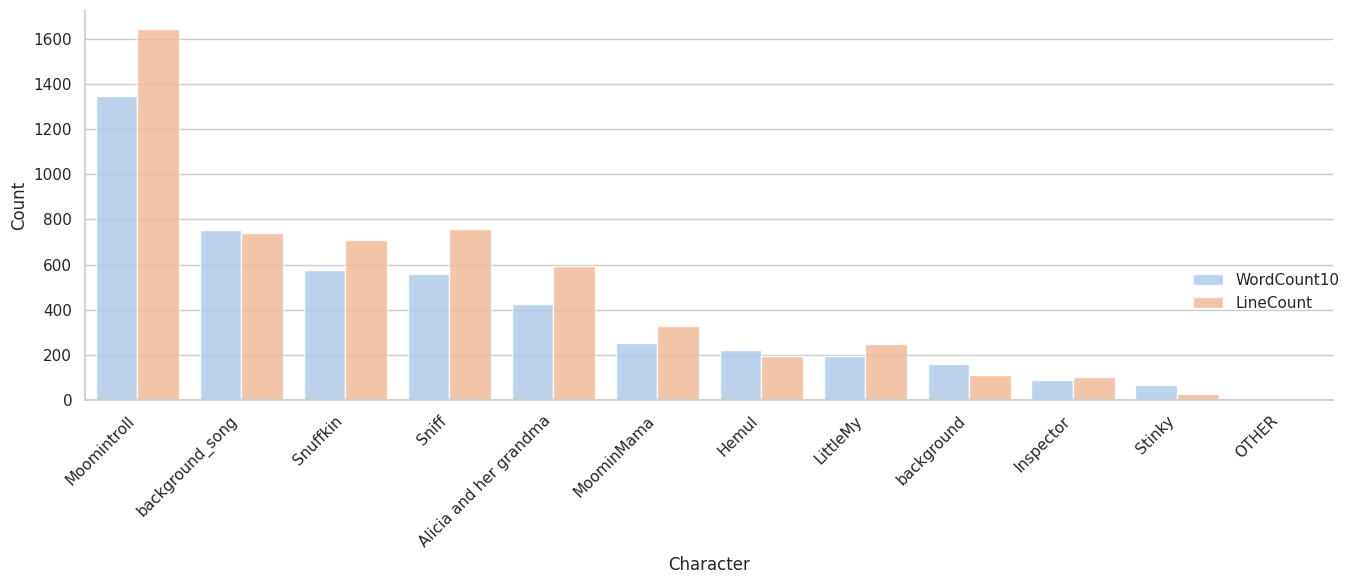

In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plot_df = counts_sorted.melt(id_vars='C_Name', value_vars=['WordCount10', 'LineCount'],
                             var_name='Metric', value_name='Value')

sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=plot_df, kind="bar",
    x="C_Name", y="Value", hue="Metric",
    palette= sns.color_palette("pastel"), alpha=0.8, height=6, aspect=2
)

g.set_axis_labels("Character", "Count")
g.set_titles("Line Count vs Word Count (/10) by Character")
g.set_xticklabels(rotation=45, ha='right')
g._legend.set_title("")  # Remove legend title
plt.tight_layout()
plt.savefig("character_most.pdf", format="pdf", bbox_inches="tight")
plt.show()

